In [320]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
data=pd.read_csv('values.csv')

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

<AxesSubplot:>

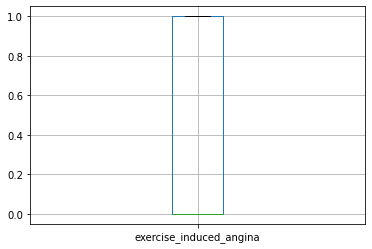

In [129]:
data.boxplot(column='exercise_induced_angina')

<AxesSubplot:>

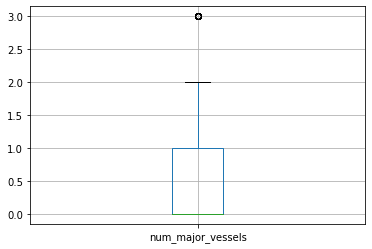

In [152]:
data.boxplot(column="num_major_vessels")

In [131]:
#  TO REMOVE OUTLIERS

def outliers(df,ft):
    q1=data[ft].quantile(0.25)
    q3=data[ft].quantile(0.75)
    Iqr=q3-q1
    
    lowerbound=q1-1.5*Iqr
    upperbound=q3+1.5*Iqr
    
    list=data.index[(data[ft]<lowerbound) | (data[ft]>upperbound)]
    
    return list
    

In [153]:
indexlist=[]
for feature in ['resting_blood_pressure','serum_cholesterol_mg_per_dl','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression']:
    indexlist.extend(outliers(data,feature))
    

In [316]:
def remove(data, indexlist1):
    indexlist1=sorted(set(indexlist))
    data1=data.drop(indexlist1)
    return data1

<AxesSubplot:>

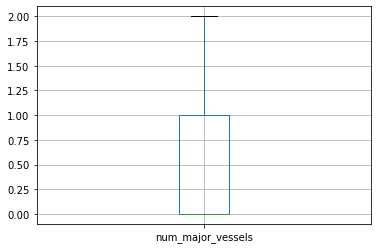

In [318]:
datacleaned=remove(data,indexlist)
datacleaned.boxplot('num_major_vessels')

In [302]:
data['thal'].value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

In [303]:
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

In [304]:
X=datacleaned.drop(columns='exercise_induced_angina')


X['patient_id']=pd.factorize(X.patient_id)[0]
datacleaned.patient_id.value_counts()
X['thal']=pd.factorize(X.thal)[0]
datacleaned.thal.value_counts()
X.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved
172,123,2,1,118,4,0,0,0,219,1.2,1,39,140
173,124,1,1,140,4,0,0,0,299,1.6,1,51,173
174,125,1,0,140,4,0,0,0,239,1.2,1,54,160
177,126,2,1,125,3,0,0,0,309,1.8,1,64,131
179,127,1,0,160,3,1,0,0,201,0.0,0,54,163


In [305]:
y=datacleaned['exercise_induced_angina']


In [287]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=20)

In [288]:
model=LogisticRegression()

In [289]:
model.fit(X_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [339]:
X

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved
0,0,1,0,128,2,0,0,2,308,0.0,1,45,170
1,1,2,0,110,3,0,0,0,214,1.6,0,54,158
3,2,1,1,152,4,0,0,0,223,0.0,1,40,181
5,3,1,0,130,3,0,0,0,180,0.0,1,42,150
6,4,2,1,150,4,2,0,2,258,2.6,0,60,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,123,2,1,118,4,0,0,0,219,1.2,1,39,140
173,124,1,1,140,4,0,0,0,299,1.6,1,51,173
174,125,1,0,140,4,0,0,0,239,1.2,1,54,160
177,126,2,1,125,3,0,0,0,309,1.8,1,64,131


In [290]:
ypred=model.predict(X_test)

In [292]:
accuracy=accuracy_score(ypred,y_test)
accuracy

0.8461538461538461

In [293]:
confusionm=confusion_matrix(ypred,y_test)
confusionm

array([[8, 1],
       [1, 3]], dtype=int64)

In [294]:
#NAIVE BAYES ALGORITHM

In [295]:

model1=GaussianNB()

In [296]:
model1.fit(X_train,y_train)

GaussianNB()

In [297]:
ypred1=model1.predict(X_test)

In [298]:
accuracy1=accuracy_score(ypred1,y_test)
accuracy1

0.7692307692307693

In [299]:
confusionm1=confusion_matrix(ypred1,y_test)
confusionm1

array([[7, 1],
       [2, 3]], dtype=int64)

In [359]:
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier(n_neighbors=10)
score=cross_val_score(knn,X,y,cv=8)
score.mean()

0.75

In [365]:
score1=cross_val_score(model1,X,y,cv=8)
score1.mean()

0.78125

In [391]:
dectree=DecisionTreeClassifier(max_depth=4)
accuracy3=cross_val_score(dectree,X,y)
accuracy3.mean()

0.7489230769230769

In [385]:
randomforest=RandomForestClassifier(n_estimators=50)
score2=cross_val_score(randomforest,X,y)
score2.mean()

0.7806153846153846